In [1]:
import csv
import networkx as nx

In [2]:
#G = nx.Graph()
G = nx.DiGraph() 

In [3]:
#make list of singl attorney name
listAttorneyNames = list()
with open('employment_hist.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    #id	attorney	employer
    for row in reader:
        #print(row['id'],row['attorney'],row['employer'])
        listAttorneyNames.append(row['attorney'])
        
#clear list from dublicates
listAttorneyNames = list(set(listAttorneyNames))


In [4]:
#make nodes of attorney and dict
id = 1
dictAttorney = dict()
for n in listAttorneyNames:
    
    G.add_node(id,type="attorney",name=n)
    dictAttorney[id] = n
    id +=1

In [5]:
#make list of singl employers
listEmployer = list()
with open('employment_hist.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    #id	attorney	employer
    for row in reader:
        #print(row['id'],row['attorney'],row['employer'])
        listEmployer.append(row['employer'])
        
#clear list from dublicates
listEmployer = list(set(listEmployer))

In [6]:
#make nodes of employers and dict 
id = 200
dictEmployers = dict()
for n in listEmployer:
    
    G.add_node(id,type="employer",name=n)
    dictEmployers[id] = n
    id += 1

In [7]:
#dictEmployers

In [8]:
def find_id_node(dictOfWords,SearchStr):
    listOfKeys = [key  for (key, value) in dictOfWords.items() if value == SearchStr]
    return listOfKeys[0]

In [9]:
#find_id_node(dictEmployers,'Reed Smith LLP')

In [10]:
with open('employment_hist.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    #id	attorney	employer
    for row in reader:
        #print(find_id_node(dictAttorney,row['attorney']),  find_id_node(dictEmployers,row['employer']))
        G.add_edge(find_id_node(dictAttorney,row['attorney']),  find_id_node(dictEmployers,row['employer']))
        


In [11]:
#list(G.in_degree([267]))

In [12]:
#list(G.predecessors(267))

In [13]:
# add to every node employer atribut in_degree
for n in G.nodes.data():
    if n[1]['type'] == 'employer':
        in_degree = list(G.in_degree([n[0]]))
        G.nodes[n[0]]['in_degree_employer'] = in_degree[0][1]
        if in_degree[0][1] > 2:
            print(in_degree[0][1],n[1]['name'])
            

3 Jones Day LLP
3 (US) Marine Corps
3 United States Attorney's Office for the Northern District of Illinois
4 United States Supreme Court
4 US Army Judge Advocate General's Corp
13 Private Practice
13 United States Department of Justice


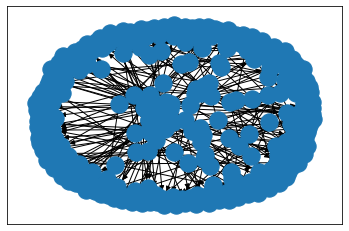

In [14]:
#check net
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,with_labels=False)

In [15]:
nx.write_gexf(G, "02_employment_hist.gexf")